Relating MB of HEF to NAO monthly index - I compared it to hydro month.

/tmp/ipykernel_4761/904617004.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_nao = pd.read_csv(nao_file, delim_whitespace=True, header=None, names=["calendar_year", "month", "NAO_index"])


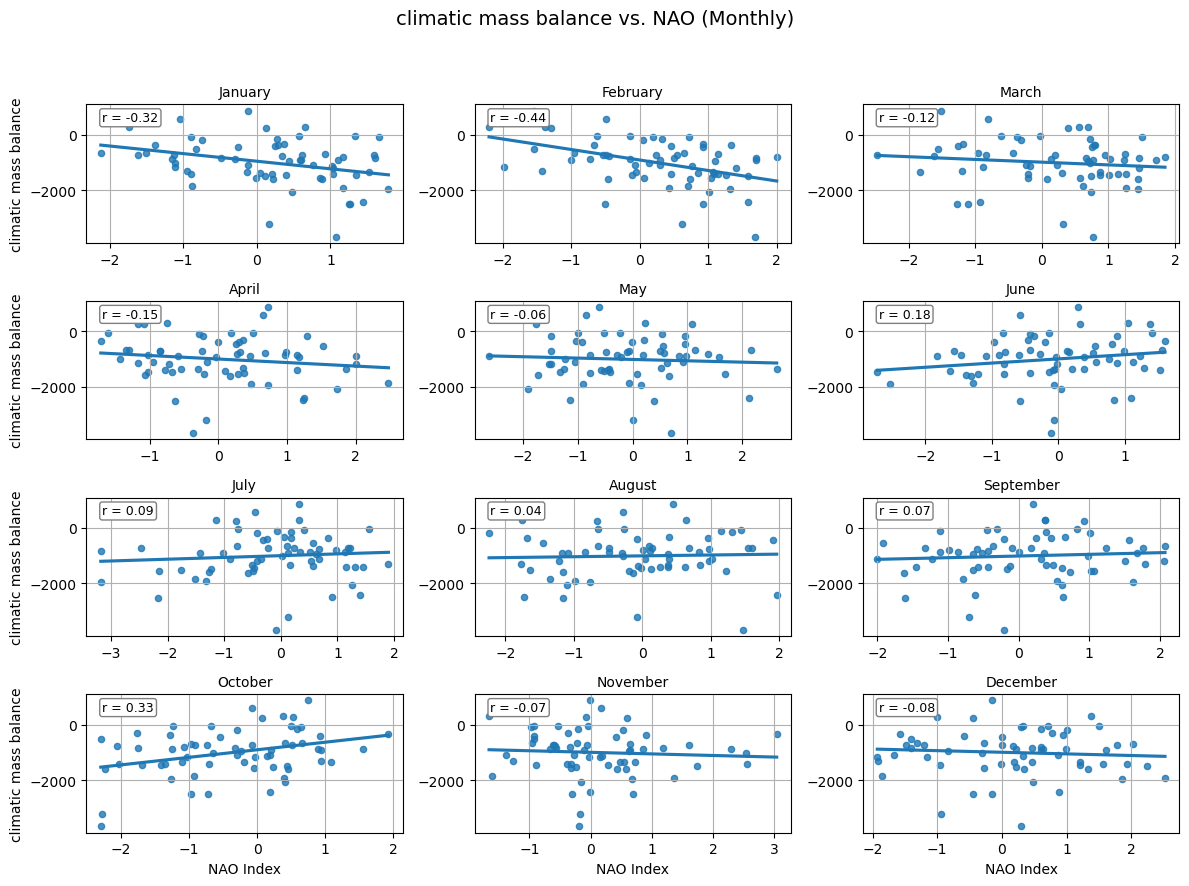

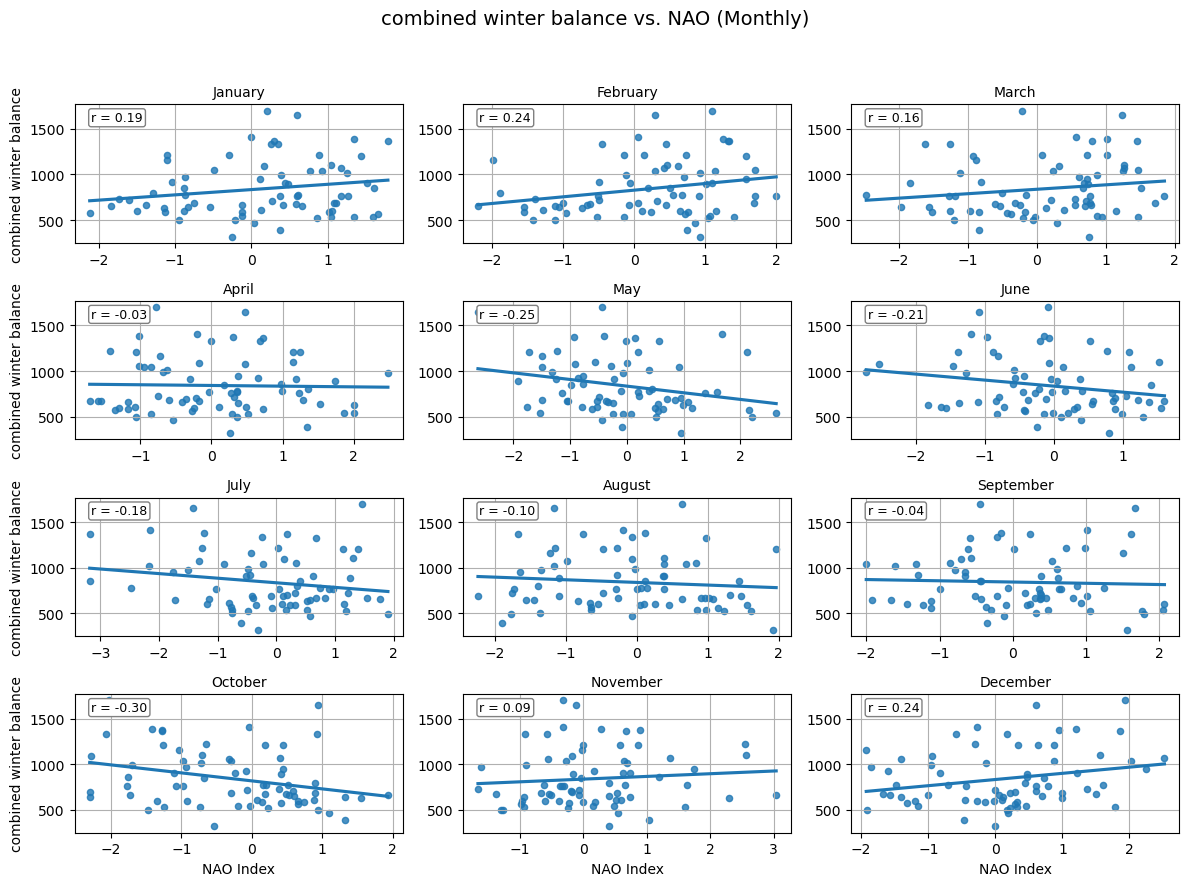

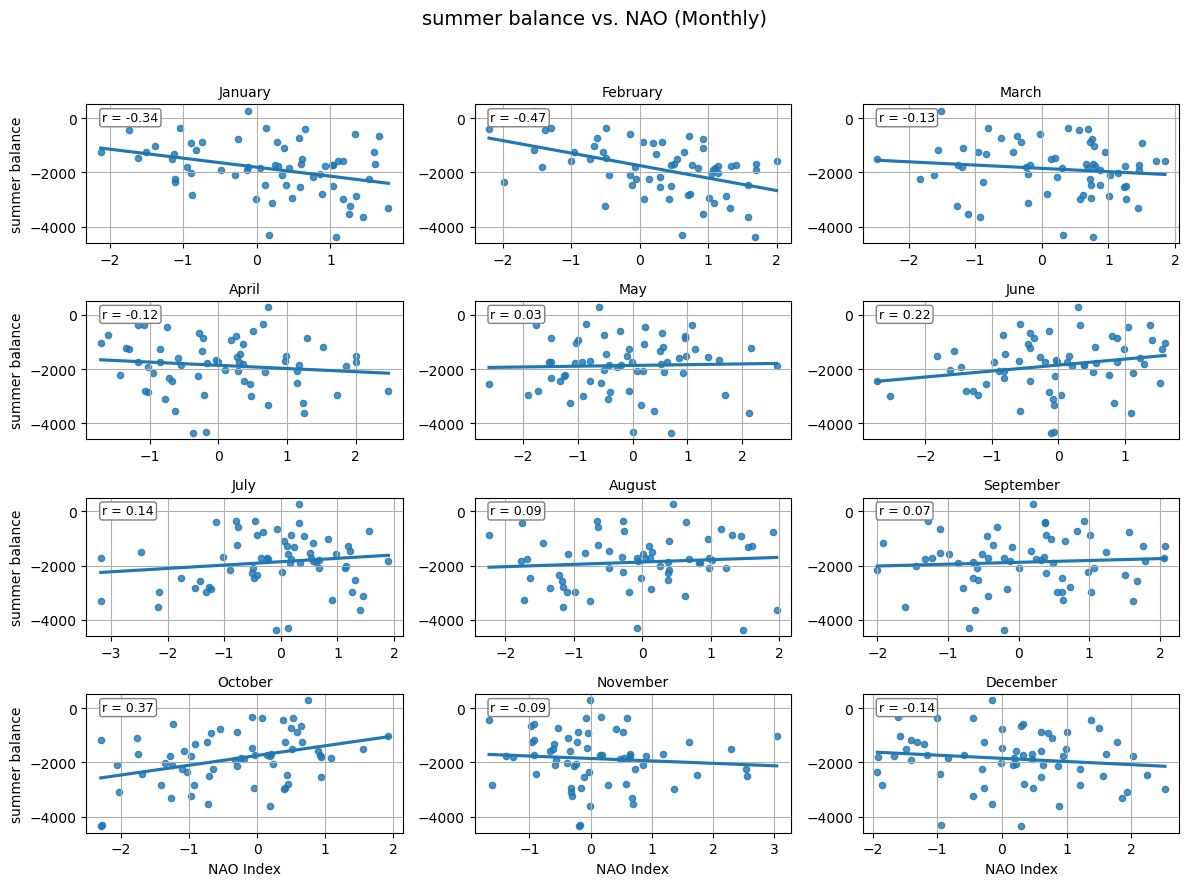

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load NAO index data from text file
nao_file = "/home/pcuser/hef/norm.nao.monthly.b5001.current.ascii.txt"
df_nao = pd.read_csv(nao_file, delim_whitespace=True, header=None, names=["calendar_year", "month", "NAO_index"])
df_nao["hydrological_year"] = df_nao["calendar_year"]
df_nao.loc[df_nao["month"] >= 9, "hydrological_year"] += 1

# Read in mass balance data
df_hef_MB = pd.read_pickle("hef_MB_combined.pkl")

# Define mass balance variables to compare
mass_balance_vars = [
    "climatic mass balance",
    "combined winter balance",
    "summer balance"
]

# Plotting for each variable
for var in mass_balance_vars:
    fig, axes = plt.subplots(4, 3, figsize=(12, 9), sharex=False, sharey=False)
    fig.suptitle(f"{var} vs. NAO (Monthly)", fontsize=14)
    axes = axes.flatten()

    for month in range(1, 13):  # Months 1–12
        ax = axes[month - 1]

        # Filter NAO index for the given month
        df_nao_month = df_nao[df_nao["month"] == month].drop(columns=["month"])

        # Merge NAO data with mass balance data
        df_merged = pd.merge(df_hef_MB, df_nao_month, on="hydrological_year", how="inner")

        # Plot with seaborn
        sns.regplot(x="NAO_index", y=var, data=df_merged, ax=ax, ci=None, scatter_kws={'s': 20})

        # Month title
        month_name = pd.to_datetime(str(month), format="%m").strftime('%B')
        ax.set_title(month_name, fontsize=10)

        # Axis labels (only on left and bottom to reduce clutter)
        if month % 3 == 1:
            ax.set_ylabel(var)
        else:
            ax.set_ylabel("")
        if month > 9:
            ax.set_xlabel("NAO Index")
        else:
            ax.set_xlabel("")

        # Grid
        ax.grid(True)

        # Correlation text
        corr = df_merged["NAO_index"].corr(df_merged[var])
        ax.text(0.05, 0.95, f"r = {corr:.2f}", transform=ax.transAxes,
                ha='left', va='top', fontsize=9, bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="gray"))


    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
    plt.show()



## now just look at DFJ anomaly
the E.Thubert et al paper smoothed it over 7 years.

/tmp/ipykernel_4761/2391245614.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_nao = pd.read_csv(nao_file, delim_whitespace=True, header=None, names=["hydrological_year", "month", "NAO_index"])


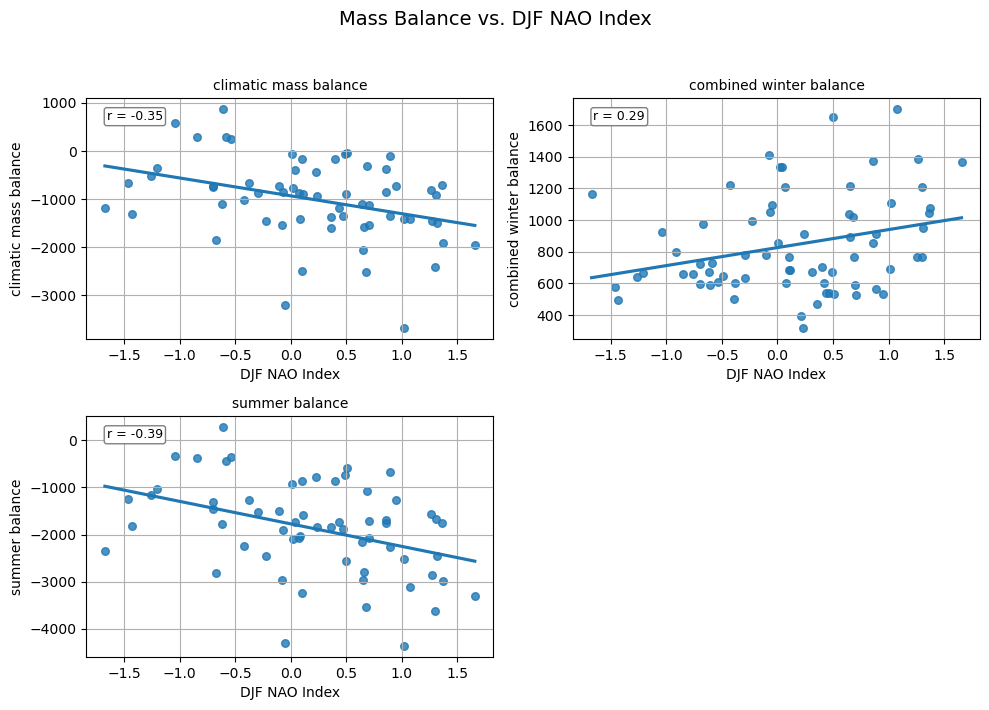

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load NAO index data
nao_file = "/home/pcuser/hef/norm.nao.monthly.b5001.current.ascii.txt"
df_nao = pd.read_csv(nao_file, delim_whitespace=True, header=None, names=["hydrological_year", "month", "NAO_index"])

# Adjust hydrological year for DJF season
df_nao["djf_year"] = df_nao["hydrological_year"]
df_nao.loc[df_nao["month"] == 12, "djf_year"] += 1

# Filter for DJF months and compute mean NAO index per DJF season
df_djf = df_nao[df_nao["month"].isin([12, 1, 2])]
df_djf_avg = df_djf.groupby("djf_year", as_index=False)["NAO_index"].mean()
df_djf_avg.rename(columns={"djf_year": "hydrological_year", "NAO_index": "NAO_DJF"}, inplace=True)

# Load mass balance data and merge with DJF NAO
df_hef_MB = pd.read_pickle("hef_MB_combined.pkl")
df_merged = pd.merge(df_hef_MB, df_djf_avg, on="hydrological_year", how="inner")

# Define mass balance variables

mass_balance_vars = [
    "climatic mass balance",
    "combined winter balance",
    "summer balance"
]

# Set up 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

# Plot each variable in a subplot
for i, var in enumerate(mass_balance_vars):
    ax = axes[i]
    sns.regplot(x="NAO_DJF", y=var, data=df_merged, ax=ax, ci=None, scatter_kws={'s': 30})
    ax.set_title(var, fontsize=10)
    ax.set_xlabel("DJF NAO Index")
    ax.set_ylabel(var)

    # Correlation annotation
    corr = df_merged["NAO_DJF"].corr(df_merged[var])
    ax.text(0.05, 0.95, f"r = {corr:.2f}", transform=ax.transAxes,
            ha='left', va='top', fontsize=9, bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="gray"))

    ax.grid(True)

    
# Remove empty last subplot if fewer than 6 plots
if len(mass_balance_vars) < len(axes):
    for j in range(len(mass_balance_vars), len(axes)):
        fig.delaxes(axes[j])

fig.suptitle("Mass Balance vs. DJF NAO Index", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load NAO index data
nao_file = "/home/pcuser/hef/norm.nao.monthly.b5001.current.ascii.txt"
df_nao = pd.read_csv(nao_file, delim_whitespace=True, header=None,
                     names=["hydrological_year", "month", "NAO_index"])

# Adjust hydrological year for DJF season
df_nao["djf_year"] = df_nao["hydrological_year"]
df_nao.loc[df_nao["month"] == 12, "djf_year"] += 1

# Filter for DJF months and compute average NAO per DJF season
df_djf = df_nao[df_nao["month"].isin([12, 1, 2])]
df_djf_avg = df_djf.groupby("djf_year", as_index=False)["NAO_index"].mean()
df_djf_avg.rename(columns={"djf_year": "hydrological_year", "NAO_index": "NAO_DJF_raw"}, inplace=True)

# Apply 7-year rolling mean (centered)
df_djf_avg["NAO_DJF"] = df_djf_avg["NAO_DJF_raw"].rolling(window=7, center=True).mean()

# Load mass balance data and merge with smoothed NAO index
df_hef_MB = pd.read_pickle("hef_MB.pkl")
df_merged = pd.merge(df_hef_MB, df_djf_avg[["hydrological_year", "NAO_DJF"]], on="hydrological_year", how="inner")

# Drop rows with NaNs (from smoothing edges)
df_merged = df_merged.dropna(subset=["NAO_DJF"])

# Define mass balance variables
mass_balance_vars = [
    "climatic mass balance",
    "combined winter balance",
    "summer balance"
]


# Store results
correlation_results = {var: [] for var in mass_balance_vars}

# Loop through smoothing window lengths (0 = no smoothing)
for window in range(0, 21):
    if window == 0:
        df_djf_avg["NAO_smoothed"] = df_djf_avg["NAO_DJF_raw"]
    else:
        df_djf_avg["NAO_smoothed"] = df_djf_avg["NAO_DJF_raw"].rolling(window=window, center=True).mean()

    # Merge with MB data
    df_merged = pd.merge(df_hef_MB, df_djf_avg[["hydrological_year", "NAO_smoothed"]], on="hydrological_year", how="inner")
    df_merged = df_merged.dropna(subset=["NAO_smoothed"])

    for var in mass_balance_vars:
        if var in df_merged:
            corr = df_merged["NAO_smoothed"].corr(df_merged[var])
            correlation_results[var].append((window, corr))

# Print results
print("\nCorrelation coefficients by smoothing window (0–20 years):\n")
for var in mass_balance_vars:
    print(f"\n{var}:")
    for window, corr in correlation_results[var]:
        print(f"  Window {window:2d}: r = {corr:.3f}")





Correlation coefficients by smoothing window (0–20 years):


climatic mass balance:
  Window  0: r = -0.352
  Window  1: r = -0.352
  Window  2: r = -0.355
  Window  3: r = -0.424
  Window  4: r = -0.455
  Window  5: r = -0.502
  Window  6: r = -0.563
  Window  7: r = -0.559
  Window  8: r = -0.573
  Window  9: r = -0.543
  Window 10: r = -0.535
  Window 11: r = -0.531
  Window 12: r = -0.540
  Window 13: r = -0.527
  Window 14: r = -0.522
  Window 15: r = -0.523
  Window 16: r = -0.535
  Window 17: r = -0.515
  Window 18: r = -0.525
  Window 19: r = -0.530
  Window 20: r = -0.546

combined winter balance:

summer balance:


/tmp/ipykernel_4761/3084235175.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_nao = pd.read_csv(nao_file, delim_whitespace=True, header=None,


In [ ]:
# Set up 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

# Plot each variable in a subplot
for i, var in enumerate(mass_balance_vars):
    ax = axes[i]
    sns.regplot(x="NAO_DJF", y=var, data=df_merged, ax=ax, ci=None, scatter_kws={'s': 30})
    ax.set_title(var, fontsize=10)
    ax.set_xlabel("7-Year Smoothed DJF NAO Index")
    ax.set_ylabel(var)

    # Correlation annotation
    corr = df_merged["NAO_DJF"].corr(df_merged[var])
    ax.text(0.05, 0.95, f"r = {corr:.2f}", transform=ax.transAxes,
            ha='left', va='top', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="gray"))

    ax.grid(True)
    print(f"Correlation between {var} and 7-year smoothed DJF NAO: {corr:.3f}")

# Remove any unused subplot
if len(mass_balance_vars) < len(axes):
    for j in range(len(mass_balance_vars), len(axes)):
        fig.delaxes(axes[j])

fig.suptitle("Mass Balance vs. 7-Year Smoothed DJF NAO Index", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()